# Artificial Neural Network(ANN) on DiamondPriceData

In [ ]:
import numpy as np
import pandas as pd

np.set_printoptions(suppress=True)

dataNum = pd.read_pickle('DiamondPrice.pkl')
dataNum.head()

,price,carat,cut,clarity,depth,table,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,326,0.23,2,2,61.5,55.0,3.95,3.98,2.43,0,1,0,0,0,0,0
1,326,0.21,5,1,59.8,61.0,3.89,3.84,2.31,0,1,0,0,0,0,0
2,327,0.23,3,3,56.9,65.0,4.05,4.07,2.31,0,1,0,0,0,0,0
3,334,0.29,5,4,62.4,58.0,4.20,4.23,2.63,0,0,0,0,0,1,0
4,335,0.31,3,2,63.3,58.0,4.34,4.35,2.75,0,0,0,0,0,0,1


In [ ]:
dataNum.columns

Index(['price', 'carat', 'cut', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J'],
      dtype='object')

In [ ]:
Target = ['price']
Predictors = ['carat', 'cut', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J']
X = dataNum[Predictors].values
y = dataNum[Target].values

### Standardize the data ###
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler

PredictorScaler=StandardScaler()
TargetScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetScalerFit=TargetScaler.fit(y)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetScalerFit.transform(y)

from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X,y, test_size = 0.3, random_state = 2021)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(37651, 15)
(16137, 15)
(37651, 1)
(16137, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [ ]:
#Creat the ANN
model = Sequential()

model.add(Dense(units=5,input_dim=15,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=5,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=1,kernel_initializer='normal'))

model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.fit(X_train,y_train,batch_size=50,epochs=10)

Epoch 1/10
37651/37651 [==============================] - 1s 29us/step - loss: 0.2984
Epoch 2/10
37651/37651 [==============================] - 1s 21us/step - loss: 0.0916
Epoch 3/10
37651/37651 [==============================] - 1s 21us/step - loss: 0.0897
Epoch 4/10
37651/37651 [==============================] - 1s 21us/step - loss: 0.0876
Epoch 5/10
37651/37651 [==============================] - 1s 20us/step - loss: 0.0863
Epoch 6/10
37651/37651 [==============================] - 1s 21us/step - loss: 0.0848
Epoch 7/10
37651/37651 [==============================] - 1s 21us/step - loss: 0.0836
Epoch 8/10
37651/37651 [==============================] - 1s 21us/step - loss: 0.0821
Epoch 9/10
37651/37651 [==============================] - 1s 21us/step - loss: 0.0805
Epoch 10/10
37651/37651 [==============================] - 1s 20us/step - loss: 0.0785


In [ ]:
def FindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[30, 50, 70, 100]
    epoch_list  =   [5, 10, 25, 50]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=15, kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = 10, verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)

In [ ]:
# Calling the function
ResultsData=FindBestParams(X_train, y_train, X_test, y_test)

1 Parameters: batch_size: 30 - epochs: 5 Accuracy: 119.42834380105062
2 Parameters: batch_size: 30 - epochs: 10 Accuracy: 125.21974790258886
3 Parameters: batch_size: 30 - epochs: 25 Accuracy: 112.61952482384645
4 Parameters: batch_size: 30 - epochs: 50 Accuracy: 121.03296430524641
5 Parameters: batch_size: 50 - epochs: 5 Accuracy: 107.15357151789026
6 Parameters: batch_size: 50 - epochs: 10 Accuracy: 117.66467625569341
7 Parameters: batch_size: 50 - epochs: 25 Accuracy: 122.40837657456068
8 Parameters: batch_size: 50 - epochs: 50 Accuracy: 121.46866434134486
9 Parameters: batch_size: 70 - epochs: 5 Accuracy: 131.35588933789796
10 Parameters: batch_size: 70 - epochs: 10 Accuracy: 121.29318879491707
11 Parameters: batch_size: 70 - epochs: 25 Accuracy: 119.98331710505832
12 Parameters: batch_size: 70 - epochs: 50 Accuracy: 125.54687494670662
13 Parameters: batch_size: 100 - epochs: 5 Accuracy: 119.57992220630096
14 Parameters: batch_size: 100 - epochs: 10 Accuracy: 122.77600161457623
15 

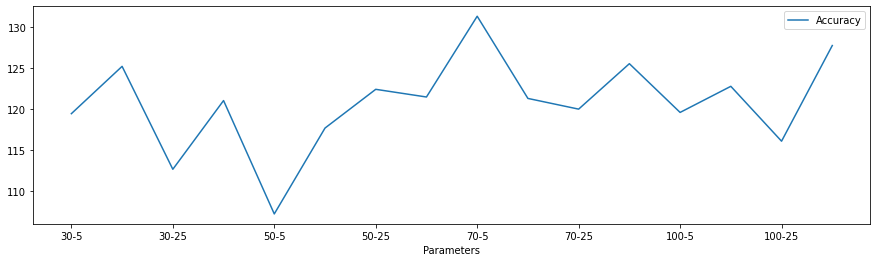

In [ ]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

In [ ]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 70, epochs = 10, verbose=0)

In [ ]:
# Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted Price data back to original price scale
Predictions=TargetScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Price']=y_test_orig
TestingData['PredictedPrice']=Predictions
TestingData.head()

,carat,cut,clarity,depth,table,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J,Price,PredictedPrice
0,1.06,2.0,2.0,61.4,57.0,6.57,6.63,4.05,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3777.0,4872.924805
1,0.72,5.0,3.0,63.0,56.0,5.72,5.67,3.59,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1875.0,2053.253906
2,1.52,5.0,2.0,58.1,60.0,7.59,7.53,4.39,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9831.0,11912.320312
3,1.01,5.0,4.0,61.2,58.0,6.49,6.46,3.96,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5864.0,6109.651855
4,1.01,5.0,3.0,61.1,61.0,6.46,6.40,3.93,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7785.0,5205.551758


In [ ]:
APE=100* (abs(TestingData['Price']-TestingData['PredictedPrice'])/TestingData['Price'])
TestingData['APE']=APE
print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: 82.6658990104419


,carat,cut,clarity,depth,table,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J,Price,PredictedPrice,APE
0,1.06,2.0,2.0,61.4,57.0,6.57,6.63,4.05,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3777.0,4872.924805,29.015748
1,0.72,5.0,3.0,63.0,56.0,5.72,5.67,3.59,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1875.0,2053.253906,9.506875
2,1.52,5.0,2.0,58.1,60.0,7.59,7.53,4.39,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9831.0,11912.320312,21.170993
3,1.01,5.0,4.0,61.2,58.0,6.49,6.46,3.96,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5864.0,6109.651855,4.189152
4,1.01,5.0,3.0,61.1,61.0,6.46,6.40,3.93,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7785.0,5205.551758,33.133568


# Artificial Neural Network(ANN) on ChurnData

In [ ]:
# Reading the cleaned numeric car prices data
import pandas as pd
import numpy as np

# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)

Data=pd.read_pickle('ChurnData.pkl')
Data.head()

,Churn,utilization,Age,Num_loans,Num_dependents,MonthlyIncome,Num_Savings_Acccts,DebtRatio
0,1,0.766127,45,6,2,9120,2,0.852982
1,0,0.957151,40,0,1,4600,2,0.121876
2,0,0.658180,38,0,0,5042,2,0.085113
3,0,0.233810,30,0,0,5300,2,0.036050
4,0,0.907239,49,1,0,6357,2,0.024926


In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros= RandomOverSampler(random_state=24, ratio=1)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# Separate Target Variable and Predictor Variables
Target='Churn'
Predictors=['utilization', 'Age', 'Num_loans', 'Num_dependents','MonthlyIncome', 'Num_Savings_Acccts', 'DebtRatio']


X=Data[Predictors].values
y=Data[Target].values

# Treating Imbalance
X,y = ros.fit_resample(X,y)

### Sandardization of data ###
### We does not standardize the Target variable for classification
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=24)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(192621, 7)
(192621,)
(82553, 7)
(82553,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [ ]:
classifier = Sequential()
# Defining the Input layer and FIRST hidden layer
# relu means Rectifier linear unit function
classifier.add(Dense(units=10, input_dim=7, kernel_initializer='uniform', activation='relu'))

#Defining the SECOND hidden layer, here we have not defined input because it is
# second layer and it will get input as the output of first hidden layer
classifier.add(Dense(units=10, kernel_initializer='uniform', activation='relu'))

# Defining the Output layer
# sigmoid means sigmoid activation function
# for Multiclass classification the activation ='softmax'
# And output_dim will be equal to the number of factor levels
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Optimizer== the algorithm of SGG to keep updating weights
# loss== the loss function to measure the accuracy
# metrics== the way we will compare the accuracy after each step of SGD
classifier.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# fitting the Neural Network on the training data
ChurnANN_Model=classifier.fit(X_train,y_train, batch_size=50 , epochs=10,verbose=1)

Epoch 1/10
192621/192621 [==============================] - 4s 23us/step - loss: 0.4770 - accuracy: 0.7753
Epoch 2/10
192621/192621 [==============================] - 5s 24us/step - loss: 0.4456 - accuracy: 0.7919
Epoch 3/10
192621/192621 [==============================] - 4s 23us/step - loss: 0.4386 - accuracy: 0.7959
Epoch 4/10
192621/192621 [==============================] - 4s 22us/step - loss: 0.4318 - accuracy: 0.7995
Epoch 5/10
192621/192621 [==============================] - 4s 22us/step - loss: 0.4184 - accuracy: 0.8028
Epoch 6/10
192621/192621 [==============================] - 4s 21us/step - loss: 0.4070 - accuracy: 0.8063
Epoch 7/10
192621/192621 [==============================] - 5s 24us/step - loss: 0.4015 - accuracy: 0.8087
Epoch 8/10
192621/192621 [==============================] - 4s 23us/step - loss: 0.3975 - accuracy: 0.8097
Epoch 9/10
192621/192621 [==============================] - 5s 23us/step - loss: 0.3932 - accuracy: 0.8114
Epoch 10/10
192621/192621 [==========

In [ ]:
# Predictions on testing data
Predictions=classifier.predict(X_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

# Generating a data frame for analyzing the test data
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Churn']=y_test
TestingData['PredictedChurnProb']=Predictions

def probThreshold(inpProb):
    if inpProb>0.5:
        return(1)
    else:
        return(0)

TestingData['PredictedChurn']=TestingData['PredictedChurnProb'].apply(probThreshold)
TestingData.head()

,utilization,Age,Num_loans,Num_dependents,MonthlyIncome,Num_Savings_Acccts,DebtRatio,Churn,PredictedChurnProb,PredictedChurn
0,0.016310,55.0,2.0,0.0,6357.0,2.0,0.274502,0,0.008011,0
1,1.000000,41.0,0.0,2.0,3682.0,3.0,0.366318,1,0.980060,1
2,1.000000,42.0,0.0,2.0,8448.0,2.0,0.182915,1,0.618406,1
3,0.339612,65.0,1.0,0.0,2996.0,8.0,0.640257,1,0.919269,1
4,0.267830,51.0,2.0,0.0,5800.0,2.0,0.536964,0,0.496507,0


In [ ]:
from sklearn import metrics
print(metrics.classification_report(TestingData['Churn'], TestingData['PredictedChurn']))
print(metrics.confusion_matrix(TestingData['Churn'], TestingData['PredictedChurn']))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81     41254
           1       0.82      0.81      0.81     41299

    accuracy                           0.81     82553
   macro avg       0.81      0.81      0.81     82553
weighted avg       0.81      0.81      0.81     82553

[[33744  7510]
 [ 7984 33315]]


### SKlearn GridSearchCV

In [ ]:
def classifier_ann(Optimizar_trial, Neuron_trial):
  from keras.models import Sequential
  from keras.layers import Dense

  #Creating classifier for ANN model
  classifier = Sequential()
  classifier.add(Dense(units=Neuron_trial,input_dim=7,kernel_initializer='uniform',activation='relu'))
  classifier.add(Dense(units=Neuron_trial,kernel_initializer='uniform',activation='relu'))
  classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
  classifier.compile(optimizer=Optimizar_trial,loss='binary_crossentropy',metrics=['accuracy'])

  return classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

Parameter_Trials = {'batch_size':[50,100,300],
                    'epochs':[5,10],
                    'Optimizar_trial':['adam','rmsprop'],
                    'Neuron_trial':[5,10]
                    }

classifierModel = KerasClassifier(classifier_ann,verbose=0)                    

In [ ]:
grid_search = GridSearchCV(estimator=classifierModel, param_grid=Parameter_Trials,scoring='f1',cv=5)

In [ ]:
grid_search.fit(X_train,y_train,verbose=1)

Epoch 1/5
154096/154096 [==============================] - 3s 22us/step - loss: 0.4945 - accuracy: 0.7668
Epoch 2/5
154096/154096 [==============================] - 3s 21us/step - loss: 0.4583 - accuracy: 0.7841
Epoch 3/5
154096/154096 [==============================] - 3s 21us/step - loss: 0.4557 - accuracy: 0.7868
Epoch 4/5
154096/154096 [==============================] - 3s 21us/step - loss: 0.4529 - accuracy: 0.7879
Epoch 5/5
154096/154096 [==============================] - 3s 21us/step - loss: 0.4496 - accuracy: 0.7891
Epoch 1/5
154097/154097 [==============================] - 3s 22us/step - loss: 0.4922 - accuracy: 0.7651
Epoch 2/5
154097/154097 [==============================] - 3s 22us/step - loss: 0.4578 - accuracy: 0.7837
Epoch 3/5
154097/154097 [==============================] - 3s 22us/step - loss: 0.4494 - accuracy: 0.7900
Epoch 4/5
154097/154097 [==============================] - 3s 22us/step - loss: 0.4455 - accuracy: 0.7922
Epoch 5/5
154097/154097 [=====================

GridSearchCV(cv=5, error_score=nan,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f94ec48e780>,
             iid='deprecated', n_jobs=None,
             param_grid={'Neuron_trial': [5, 10],
                         'Optimizar_trial': ['adam', 'rmsprop'],
                         'batch_size': [50, 100, 300], 'epochs': [5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [ ]:
grid_search.best_params_

{'Neuron_trial': 10,
 'Optimizar_trial': 'rmsprop',
 'batch_size': 50,
 'epochs': 10}

In [ ]:
grid_search.best_score_

0.800305734509824